In [0]:
# 1. 텍스트를 벡터화: '단어->벡터' or '문자->벡터' or '단어,문자->n-gram->벡터'


In [0]:
# import cell
import numpy as np


In [2]:
samples=['the cat sat on the table','the dog ate my homework']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = 1 + len(token_index)

max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split())):
    index = token_index[word]
    results[i,j,index]= 1
    
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [0]:
import string

samples=['the cat sat on the table','the dog ate my homework']
characters = string.printable # 출력 가능한 모든 아스키 문자
token_index = dict( zip(characters, range(1,len(characters) + 1)) ) # zip: (문자,숫자)..
max_length = 50
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample): # string을 for문 돌리면 문자 하나씩 읽음
    index = token_index.get(character)
    results[i,j,index]=1
results[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
from keras.preprocessing.text import Tokenizer

samples=['the cat sat on the table','the dog ate my homework']

tokenizer = Tokenizer(num_words=10) # 빈도 순위 1~1000등만 선택하는 객체

tokenizer.fit_on_texts(samples) # 샘플의 단어 인덱스 생성

# sequences, one_hot_results, word_index는 모두 fit 이후 생성 가능한 독립된 객체
sequences = tokenizer.texts_to_sequences(samples) # 인덱스 부여한 리스트 : [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
one_hot_results = tokenizer.texts_to_matrix(samples, mode= 'binary') # 벡터로, 0,1이니까 binary
#array([[0., 1., 1., ..., 0., 0., 0.],
#       [0., 1., 0., ..., 0., 0., 0.]]) , shape= (2, 1000): 문장 2개에, 빈도 세는 단어 제한 1000
word_index = tokenizer.word_index # 계산된 단어 인덱스 구하기= token_index
sequences

Using TensorFlow backend.


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [0]:
from keras.preprocessing.text import Tokenizer
samples=['the cat sat on the table','the dog ate my homework']
tokenizer = Tokenizer(num_words=11)
tokenizer.fit_on_texts(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
one_hot_results

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.]])

In [0]:
samples=['the cat sat on the table','the dog ate my homework']
dimension = 1000
max_length = 10

results = np.zeros(shape=(len(samples), max_length, dimension))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split())):
    index = abs(hash(word)) % dimension
    results[i,j,index] = 1
results.shape

(2, 10, 1000)

In [3]:
# imdb 로드
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # 특성으로 활용할 단어의 수
maxlen = 500 # 리뷰당 단어 20개까지만 적용
batch_size = 32
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 리뷰의 개수는 각각 25000개
np.load = np_load_old

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= maxlen) # (25000,20) 크기의 2d 텐서로 변환
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # pad니까 20보다 짧은 건 0 채우고, 긴 건 짜름.

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
x_train[1].shape

(500,)

In [0]:
# embedding층 추가 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 20개씩*32배치사이즈 인풋 들어감, 20000 문장이 한 에폭
model.add(Embedding(10000, 8, input_length= maxlen)) # (input 벡터 크기=단어사전 크기, output 차원, 문장길이)

model.add(Flatten()) # fc에 넣기 위해 펼치기
# 20*8=160개로 펼침

# 배치사이즈 32이므로 32개가 나옴
model.add(Dense(1, activation = 'sigmoid'))
#  160개의 값이 하나의 값으로 나와서 시그모이드 통과

model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics=['acc'])
model.summary()

histrory = model.fit(x_train, y_train, epochs = 10, batch_size= 32, validation_split= 0.2)

# 

W0725 00:44:40.065824 140375197316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 00:44:40.101914 140375197316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 00:44:40.114119 140375197316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 00:44:40.157303 140375197316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 00:44:40.176779 140375197316992 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


W0725 00:44:40.414236 140375197316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 90us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc:

In [0]:
a=x_test[0:20]

model.predict(a,batch_size=1)

array([[0.16790888],
       [0.85968304],
       [0.4607514 ],
       [0.71543556],
       [0.9823751 ],
       [0.07163067],
       [0.454907  ],
       [0.07571591],
       [0.22845569],
       [0.6964383 ],
       [0.72699445],
       [0.06678399],
       [0.03369612],
       [0.05324942],
       [0.88962173],
       [0.0905143 ],
       [0.92562145],
       [0.3501876 ],
       [0.00786606],
       [0.10715367]], dtype=float32)

In [0]:
import os

imdb_dir ='./aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

FileNotFoundError: ignored

In [0]:
x_test[1]

array([  10,   10,  472,   45,   55,  878,    8,  169,   11,  374, 5687,
         25,  203,   28,    8,  818,   12,  125,    4, 3077], dtype=int32)

In [0]:
# imdb 로드
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # 특성으로 활용할 단어의 수
maxlen = 500 # 리뷰당 단어 500개까지만 적용
batch_size = 32
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 리뷰의 개수는 각각 25000개
np.load = np_load_old

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= maxlen) # (25000,20) 크기의 2d 텐서로 변환
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # pad

In [0]:
from keras.layers import LSTM, Embedding
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features,32)) # 토큰 개수 10000개, 32차원(특성) 아웃풋
model.add(LSTM(32))
model.add(Dense(1 ,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
history= model.fit(x_train, y_train, epochs=10, batch_size= 128, validation_split=0.2)


W0725 10:20:08.889055 140691633436544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 10:20:08.896676 140691633436544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 10:20:09.138820 140691633436544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 10:20:09.159893 140691633436544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0725 10:20:09.167356 140691633436544 deprecation.py:323] From /usr/local/lib/python3.6

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.4963 - acc: 0.7693 - val_loss: 0.3480 - val_acc: 0.8592
Epoch 2/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2920 - acc: 0.8863 - val_loss: 0.3090 - val_acc: 0.8666
Epoch 3/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2365 - acc: 0.9104 - val_loss: 0.3059 - val_acc: 0.8722
Epoch 4/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2012 - acc: 0.9248 - val_loss: 0.3248 - val_acc: 0.8576
Epoch 5/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1740 - acc: 0.9358 - val_loss: 0.2916 - val_acc: 0.8834
Epoch 6/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1591 - acc: 0.9438 - val_loss: 0.3100 - val_acc: 0.8686
Epoch 7/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1409 - acc: 0.9507 - val_loss: 0.4936 - val_acc:

In [0]:
model.summary()

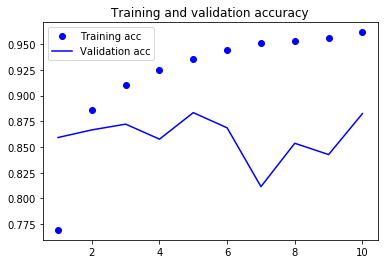

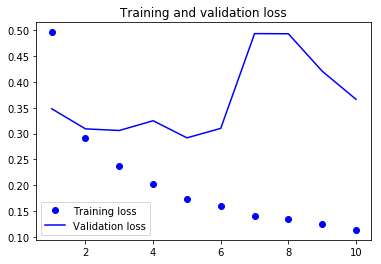

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()